In [42]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D,Reshape
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

In [43]:
# Load CIFAR-10 dataset
(x_train_org, _), (x_test_org, _) = tf.keras.datasets.cifar10.load_data()

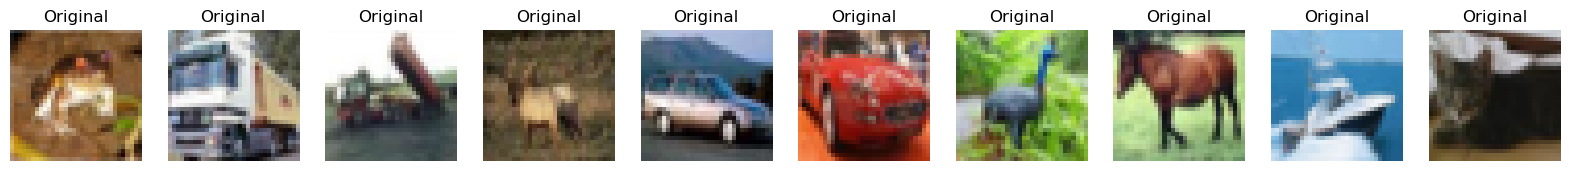

In [44]:
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(x_train_org[i])
    plt.title("Original")
    plt.axis("off")

In [47]:

# Normalize the images to [0, 1]
x_train = x_train_org.astype('float32') / 255.
x_test = x_test_org.astype('float32') / 255.

# Add random noise to the images
noise_factor = 0.2
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

# Clip the values to be in the valid range [0, 1]
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)


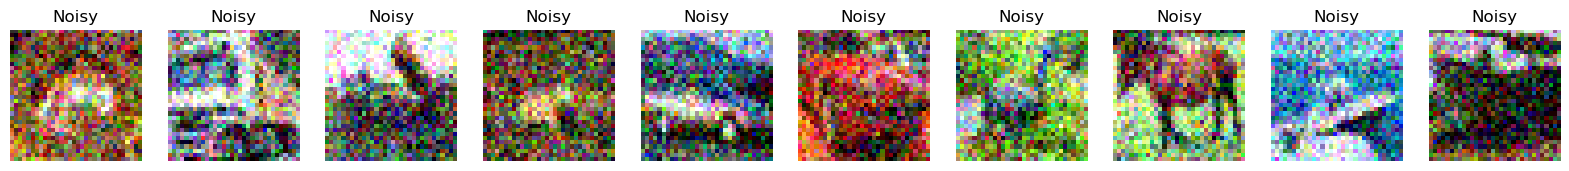

In [49]:
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display noisy
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(x_train_noisy[i])
    plt.title("Noisy")
    plt.axis("off")

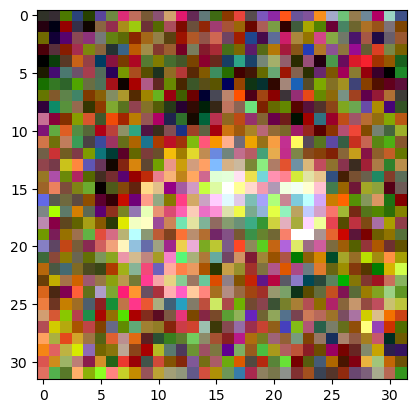

In [48]:
plt.imshow(x_train_noisy[0])

In [13]:
# Define the autoencoder model
input_img = Input(shape=(32, 32, 3))

# Encoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

# Combine encoder and decoder into the autoencoder model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


In [50]:
autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 3)      │           867 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 88,523 (345.80 KB)

 Trainable params: 29,507 (115.26 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 59,016 (230.54 KB)

In [14]:
# Train the autoencoder
autoencoder.fit(x_train_noisy, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))


Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 43s 95ms/step - loss: 0.6002 - val_loss: 0.5708
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 30s 75ms/step - loss: 0.5687 - val_loss: 0.5683
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 32s 82ms/step - loss: 0.5672 - val_loss: 0.5665
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 37s 93ms/step - loss: 0.5655 - val_loss: 0.5658
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 29s 75ms/step - loss: 0.5651 - val_loss: 0.5652
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 31s 80ms/step - loss: 0.5641 - val_loss: 0.5654
Epoch 7/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 43s 111ms/step - loss: 0.5644 - val_loss: 0.5648
Epoch 8/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 39s 100ms/step - loss: 0.5639 - val_loss: 0.5646
Epoch 9/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 29s 73ms/step - loss: 0.5637 - val_loss: 0.5639
Epoch 10/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 26s 67ms/step - loss: 0.5626 - val_loss: 0.5637
Epoch 11/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 25s 64ms/step - loss: 0.5631 - val_loss: 0.5637
Epoch 12/50
391/391 ━━━━━━━━

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step


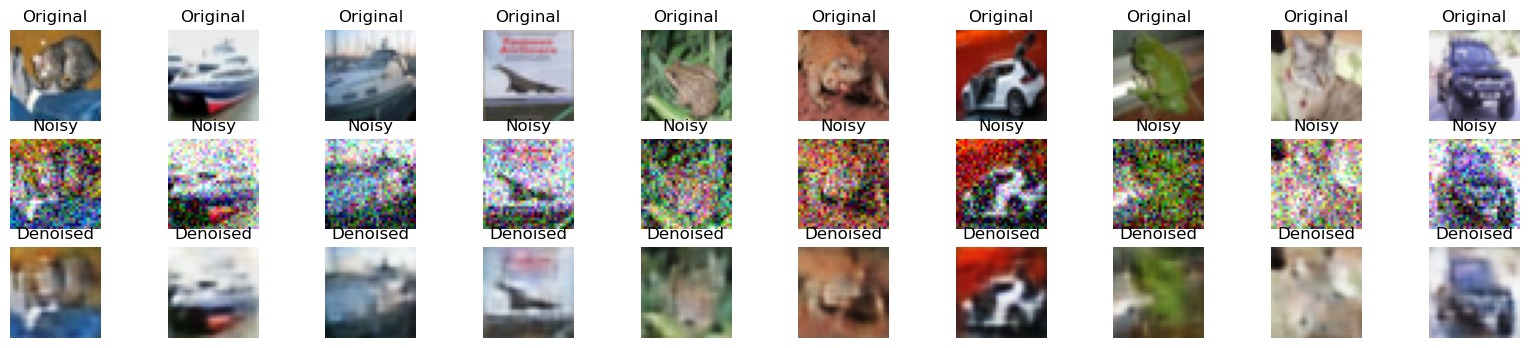

In [24]:
# Use the autoencoder to denoise images
decoded_imgs = autoencoder.predict(x_test_noisy)

# Display the original, noisy, and denoised images
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i])
    plt.title("Original")
    plt.axis("off")
    
    # Display noisy
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy[i])
    plt.title("Noisy")
    plt.axis("off")
    
    # Display denoised
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(decoded_imgs[i])
    plt.title("Denoised")
    plt.axis("off")
plt.show()


In [25]:
from sklearn.metrics import mean_squared_error

# Flatten the images for MSE calculation
x_test_flat = x_test.reshape(len(x_test), -1)
decoded_imgs_flat = decoded_imgs.reshape(len(decoded_imgs), -1)

mse = mean_squared_error(x_test_flat, decoded_imgs_flat)
print(f"Mean Squared Error (MSE): {mse}")


Mean Squared Error (MSE): 0.004733597859740257


In [26]:
import tensorflow as tf

def psnr(original, denoised):
    return tf.image.psnr(original, denoised, max_val=1.0).numpy().mean()

psnr_value = psnr(x_test, decoded_imgs)
print(f"Peak Signal-to-Noise Ratio (PSNR): {psnr_value} dB")


Peak Signal-to-Noise Ratio (PSNR): 23.5041446685791 dB


In [40]:
from skimage.metrics import structural_similarity as ssim

# Calculate SSIM for each image and take the mean
ssim_values = []
for i in range(len(x_test)):
    # Ensure data range is correctly set
    ssim_value = ssim(x_test[i], decoded_imgs[i], multichannel=True, win_size=3, data_range=1.0, channel_axis=-1)
    ssim_values.append(ssim_value)

print(f"Mean Structural Similarity Index (SSIM): {np.mean(ssim_values)}")


Mean Structural Similarity Index (SSIM): 0.6615426540374756
